### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

### Loading the data

In [2]:
data = pd.read_csv('data.csv')
data.head()

,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,temp,...,precip,pressure,visib,type,manufacturer,model,engines,seats,engine,arr_delay
0,B6,1201,N643JB,JFK,FLL,135.0,1069,21,50,73.04,...,0.0,1019.4,10.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,Turbo-fan,1.0
1,DL,1773,N3743H,JFK,LAS,287.0,2248,15,35,71.06,...,0.0,1020.4,10.0,Fixed wing multi engine,BOEING,737-832,2.0,189.0,Turbo-jet,0.0
2,EV,4572,N11107,EWR,GSP,84.0,594,15,9,78.80,...,0.0,NaN,5.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2.0,55.0,Turbo-fan,1.0
3,B6,179,N526JB,JFK,PHX,305.0,2153,17,35,44.06,...,0.0,1009.2,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,US,1733,N162UW,LGA,CLT,78.0,544,7,53,69.98,...,0.0,1021.3,10.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-211,2.0,199.0,Turbo-jet,0.0


### EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carrier       10000 non-null  object 
 1   flight        10000 non-null  int64  
 2   tailnum       9926 non-null   object 
 3   origin        10000 non-null  object 
 4   dest          10000 non-null  object 
 5   air_time      9716 non-null   float64
 6   distance      10000 non-null  int64  
 7   hour          10000 non-null  int64  
 8   minute        10000 non-null  int64  
 9   temp          9952 non-null   float64
 10  dewp          9952 non-null   float64
 11  humid         9952 non-null   float64
 12  wind_dir      9731 non-null   float64
 13  wind_speed    9951 non-null   float64
 14  wind_gust     2387 non-null   float64
 15  precip        9954 non-null   float64
 16  pressure      8808 non-null   float64
 17  visib         9954 non-null   float64
 18  type          8499 non-null

### Observations
- The columns tailnum, air_time, temp, dewp, humid, wind_dir, wind_speed, wind_gust, precip, pressure, visib, type, manufacturer, model, engines, seats, engine, arr_delay have missing data.

In [4]:
data.describe()

,flight,air_time,distance,hour,minute,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,engines,seats,arr_delay
count,10000.000000,9716.000000,10000.000000,10000.000000,10000.000000,9952.000000,9952.000000,9952.000000,9731.000000,9951.000000,2387.00000,9954.000000,8808.000000,9954.000000,8499.000000,8499.000000,9716.000000
mean,1993.785200,149.771099,1033.036700,13.185300,26.405800,56.885289,41.578652,59.699401,199.824273,11.082228,25.29643,0.004574,1017.805722,9.237887,1.993293,135.897870,0.410045
std,1637.565161,92.714630,722.747763,4.691094,19.286677,17.967138,19.360524,19.713338,106.234823,5.635370,6.14381,0.033679,7.545151,2.043394,0.097400,72.402517,0.491867
min,1.000000,21.000000,80.000000,5.000000,0.000000,10.940000,-9.040000,12.740000,0.000000,0.000000,16.11092,0.000000,985.000000,0.060000,1.000000,2.000000,0.000000
25%,580.750000,81.000000,502.000000,9.000000,9.000000,42.080000,26.060000,43.920000,120.000000,6.904680,20.71404,0.000000,1012.700000,10.000000,2.000000,55.000000,0.000000
50%,1511.000000,130.000000,872.000000,13.000000,29.000000,57.020000,42.800000,57.990000,220.000000,10.357020,24.16638,0.000000,1017.500000,10.000000,2.000000,149.000000,0.000000
75%,3514.250000,191.000000,1389.000000,17.000000,45.000000,71.960000,57.920000,75.690000,290.000000,14.960140,28.76950,0.000000,1022.700000,10.000000,2.000000,189.000000,1.000000
max,6181.000000,648.000000,4983.000000,23.000000,59.000000,100.040000,78.080000,100.000000,360.000000,42.578860,66.74524,1.210000,1042.100000,10.000000,4.000000,400.000000,1.000000


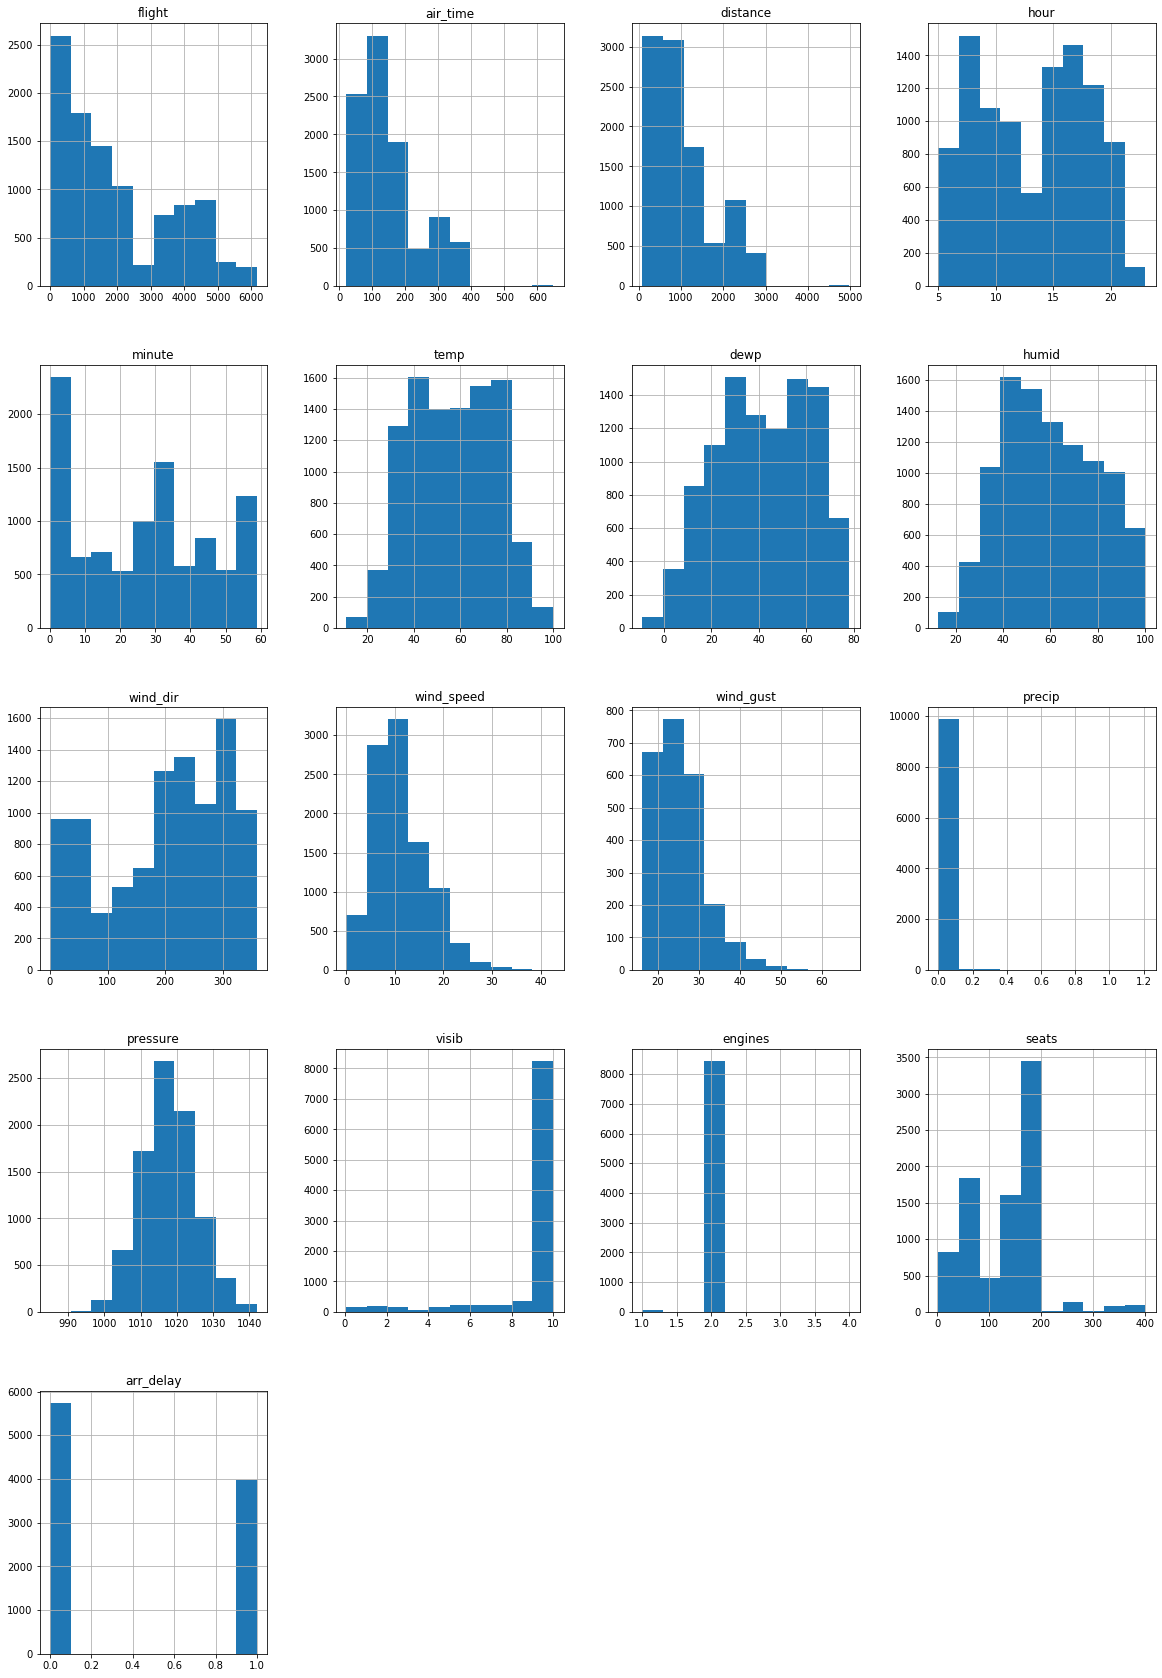

In [5]:
data.hist(figsize=(20,30))
plt.show()

In [6]:
data.drop('wind_gust', axis=1, inplace=True)
data.drop('flight', axis=1, inplace=True)
data.drop('tailnum', axis=1, inplace=True)
data.drop('engines', axis=1, inplace=True)
data = data.dropna()

In [7]:
data.head(2)

,carrier,origin,dest,air_time,distance,hour,minute,temp,dewp,humid,...,wind_speed,precip,pressure,visib,type,manufacturer,model,seats,engine,arr_delay
0,B6,JFK,FLL,135.0,1069,21,50,73.04,66.92,81.14,...,13.80936,0.0,1019.4,10.0,Fixed wing multi engine,AIRBUS,A320-232,200.0,Turbo-fan,1.0
1,DL,JFK,LAS,287.0,2248,15,35,71.06,42.98,36.28,...,14.96014,0.0,1020.4,10.0,Fixed wing multi engine,BOEING,737-832,189.0,Turbo-jet,0.0


### Spliting the data

In [8]:
X_training, X_test, y_training, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1],
                                                          test_size=0.1,
                                                          random_state = 42)

### Creating Pipeline

In [9]:
cat_columns = ['carrier','origin','dest','hour','minute','type','manufacturer','engine']
num_columns = ['air_time','distance','temp','dewp','humid','wind_dir','wind_speed','precip','pressure','visib','seats']

num_pipeline = Pipeline([('standardize_num', StandardScaler()),
                        ])

cat_pipeline = Pipeline([('create_dummies_cats', OneHotEncoder(handle_unknown='ignore'))
                         ])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_columns),
                                                      ('create_dummies', cat_pipeline, cat_columns)])

processing_pipeline

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('standardize_num',
                                                  StandardScaler())]),
                                 ['air_time', 'distance', 'temp', 'dewp',
                                  'humid', 'wind_dir', 'wind_speed', 'precip',
                                  'pressure', 'visib', 'seats']),
                                ('create_dummies',
                                 Pipeline(steps=[('create_dummies_cats',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['carrier', 'origin', 'dest', 'hour', 'minute',
                                  'type', 'manufacturer', 'engine'])])

### Creating model

In [10]:
clf1 = LogisticRegression(max_iter=5000)
clf2 = DecisionTreeClassifier()
clf3 = SVC(class_weight='balanced',probability=True)

pipe1 = Pipeline([('data_processing', processing_pipeline),('logreg', clf1)])
pipe2 = Pipeline([('data_processing', processing_pipeline),('tree', clf2)])
pipe3 = Pipeline([('data_processing', processing_pipeline),('svc', clf3)])

In [11]:
param_grid_lr= [
  {'logreg__class_weight': [None, 'balanced'], 'logreg__C':[0.01, 0.1, 1, 10, 100],'logreg__solver':['liblinear','sag','saga']}
 ]
gcv_lr = GridSearchCV(estimator=pipe1, param_grid=param_grid_lr, scoring=['accuracy'], cv=10, refit='accuracy')
gcv_lr = gcv_lr.fit(X_training, y_training)

In [12]:
y_test_pred_lr = gcv_lr.predict(X_test)
print(confusion_matrix(y_test_pred_lr, y_test))

[[375 165]
 [ 55 130]]


### Observations
- The Accuracy of logistic regression model is 69.65%.

In [13]:
param_grid_tree = [
  {'tree__max_depth': [2, 5, 10, 15, 20],
   'tree__min_samples_split':[3, 5, 10, 20, 40],
   'tree__min_samples_leaf': [2, 5],
   'tree__class_weight':[None, 'balanced']
  }
 ]

gcv_tree = GridSearchCV(estimator=pipe2, param_grid=param_grid_tree, scoring='accuracy', refit=True)
gcv_tree = gcv_tree.fit(X_training, y_training)


In [14]:
y_test_pred_tree = gcv_tree.predict(X_test)
print(confusion_matrix(y_test_pred_tree, y_test))

[[407 247]
 [ 23  48]]


### Observations
- The Accuracy of Decision tree model is 62.75%

In [ ]:
param_grid_svc = {'svc__kernel': ['linear', 'rbf'], 'svc__C': [0.01, 0.1, 1, 10]}

gcv_svc = GridSearchCV(estimator=pipe3, param_grid=param_grid_svc, scoring='accuracy', refit=True)
gcv_svc = gcv_svc.fit(X_training, y_training)


In [16]:
y_test_pred_svc = gcv_svc.predict(X_test)
print(confusion_matrix(y_test_pred_svc, y_test))

[[300 113]
 [130 182]]


### Observations
- The Accuracy of support vector model is 66.48%

### Ensembling Models

In [17]:
labs = ['Logistic Regression', 'Decision Tree', 'SVC']
clfs = [pipe1, pipe2, pipe3]
clfs = zip(labs, clfs)

for lab, clf in clfs:
    scores = cross_val_score(estimator=clf, X=X_training, y=y_training, cv=10, scoring='roc_auc')
    print(f'ROC AUC {scores.mean():.2f} (+/- {scores.std():.2f}) [{lab}]')

ROC AUC 0.71 (+/- 0.03) [Logistic Regression]
ROC AUC 0.56 (+/- 0.02) [Decision Tree]
ROC AUC 0.68 (+/- 0.03) [SVC]


In [18]:
ems = [('lr', pipe1),('dt', pipe2),('svc', pipe3)]
clf4 = VotingClassifier(estimators= ems, weights=None, voting='soft')

scores = cross_val_score(estimator=clf4, X=X_training, y=y_training, cv=10, scoring='roc_auc')
print(f'ROC AUC {scores.mean():.2f} (+/- {scores.std():.2f}) [Ensemble]')

ROC AUC 0.67 (+/- 0.03) [Ensemble]


In [24]:
params = {'lr__logreg__C':[0.001, 0.1, 1, 10], 
          'dt__tree__max_depth': [1,2,3], 
          'svc__kernel': ['linear', 'rbf'], 'svc__C': [0.01, 0.1, 1, 10]
         }

vc_gs = GridSearchCV(estimator=clf4, param_grid=params, scoring='roc_auc', refit=True)
vc_gs = vc_gs.fit(X_training, y_training)
vc_gs_score = vc_gs.score(X_test, y_test)

print(f'VotingClassifier Test ROC AUC: {vc_gs_score:.2%}')

VotingClassifier Test ROC AUC: 73.39%


### Observations
- The ROC socre of the ensembled model is 73.39% which is higher than the logitic regression, decision tree, support vector models.

### AdaBoostClassifier

In [37]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=1)
abc = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=1)
pipe4 = Pipeline([('data_processing', processing_pipeline),('tree', abc)])
pipe4.fit(X_training,y_training)
abc_predicted = pipe4.predict(X_test)

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(abc_predicted,y_test)

0.641

### Observations
- The ROC socre of AdaBoost is 64.1% which is greater than that of decision tree model, but less than logistic regression and support vector model.